<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Занятие 5. Композиции алгоритмов, случайный лес</center>
## <center>Часть 4. Случайный лес в соревновании Kaggle Forest Cover Type Prediction</center>

[Соревнование](https://www.kaggle.com/c/forest-cover-type-prediction). 
Задача учебная. Предлагается предсказывать тип лесного покрытия на участках 30х30 метров Национального заповедника Рузвельта в Колорадо.

Признаки (подробней на [странице](https://www.kaggle.com/c/forest-cover-type-prediction/data) соревнования):

- Elevation (высота) - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope (наклон) - Slope in degrees
- Horizontal_Distance_To_Hydrology (горизонтальное расстояние до воды) - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology (вертикальное расстояние до воды) - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways (горизонтальное расстояние до дорог) - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice 
- Horizontal_Distance_To_Fire_Points (горизонтальное расстояние до центров воспламенения) - Horz Dist to nearest wildfire ignition points 
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (тип почвы) - (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**Подключаем библиотеки и загружаем данные.**

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('../../data/forest_train.csv')
test = pd.read_csv('../../data/forest_test.csv')

In [3]:
train.head(1).T

,0
Id,1
Elevation,2596
Aspect,51
Slope,3
Horizontal_Distance_To_Hydrology,258
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,510
Hillshade_9am,221
Hillshade_Noon,232
Hillshade_3pm,148


**Чтоб знать, на какое качество ориетироваться, сделаем предсказание случайного леса с параметрами по умолчанию. Вместо кросс-валидации будем использовать Out-of-Bag оценку.**

In [4]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Cover_Type', index_label="Id", init_index=15121):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(init_index, 
                                                  predicted_labels.shape[0] + init_index),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [5]:
features_to_use = list(set(train.columns) 
                       - set(['Id', 'Cover_Type']))

In [6]:
first_forest = RandomForestClassifier(bootstrap=True, 
                                      oob_score=True, 
                                      random_state=42)
first_forest.fit(train[features_to_use], 
                 train['Cover_Type'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [7]:
first_forest.oob_score_

0.78498677248677251

In [8]:
first_forest_predictions = first_forest.predict(test[features_to_use])

In [9]:
write_to_submission_file(first_forest_predictions, '../../output/forest_type_first_rf.csv')

**У такой посылки на Kaggle результат - 0.71315.**

**Посмотрим на важность признаков:**

In [10]:
pd.DataFrame(first_forest.feature_importances_,
             index=train[features_to_use].columns).sort([0], ascending=False)[:10]

,0
Elevation,0.248255
Horizontal_Distance_To_Roadways,0.088990
Horizontal_Distance_To_Fire_Points,0.075994
Horizontal_Distance_To_Hydrology,0.065832
Hillshade_9am,0.056222
Hillshade_3pm,0.049009
Aspect,0.048435
Vertical_Distance_To_Hydrology,0.048041
Hillshade_Noon,0.047015
Slope,0.035043


# Исследование и создание признаков

**Смотрим на распределения признаков**

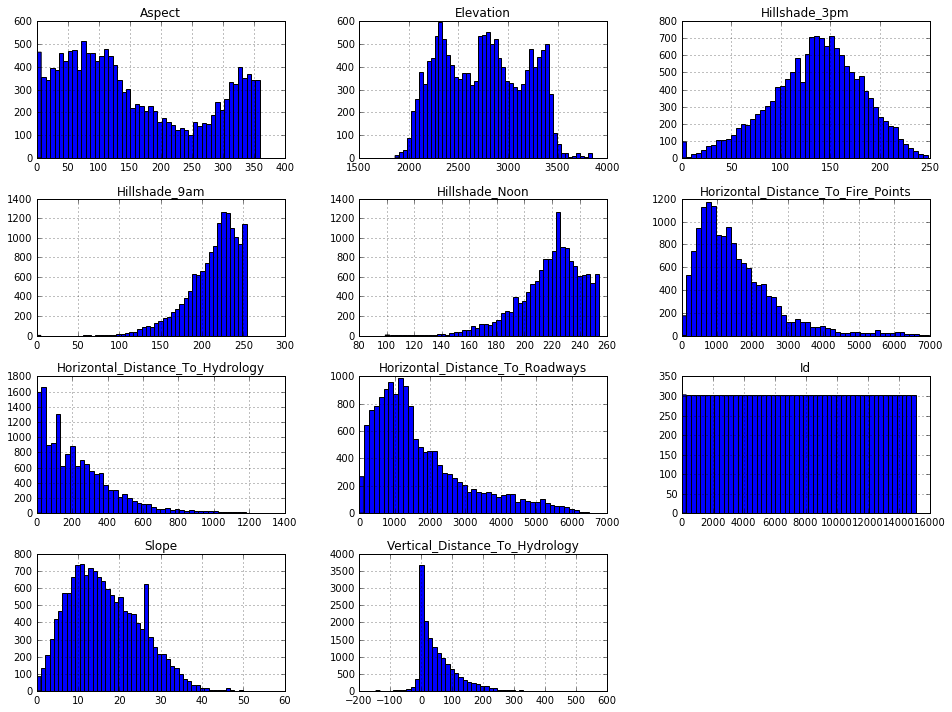

In [11]:
train.ix[:,:11].hist(figsize=(16,12),bins=50)
plt.show()

In [12]:
train['Hillshade_9am_transformed'] = np.log(train['Hillshade_9am'].max() + 1 - train['Hillshade_9am'])
test['Hillshade_9am_transformed'] = np.log(train['Hillshade_9am'].max() + 1 - test['Hillshade_9am'])

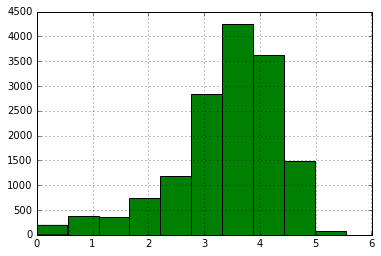

In [13]:
train['Hillshade_9am_transformed'].hist(color='green');

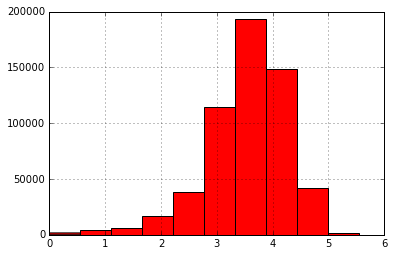

In [14]:
test['Hillshade_9am_transformed'].hist(color='red');

In [15]:
train['Horiz_dist_to_fire_transformed'] = np.log(1 + train['Horizontal_Distance_To_Fire_Points'])
test['Horiz_dist_to_fire_transformed'] = np.log(1 + test['Horizontal_Distance_To_Fire_Points'])

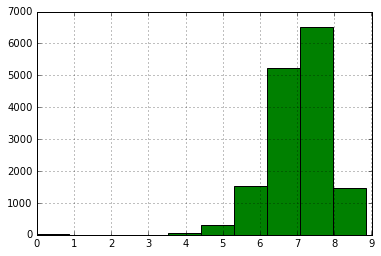

In [16]:
train['Horiz_dist_to_fire_transformed'].hist(color='green');

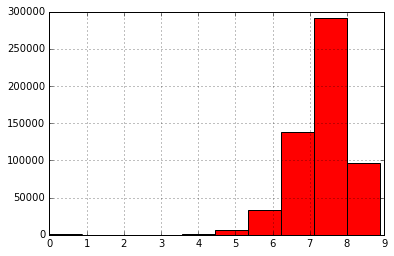

In [17]:
test['Horiz_dist_to_fire_transformed'].hist(color='red');

In [18]:
train['Horiz_dist_to_hydro_transformed'] = np.log(1 + train['Horizontal_Distance_To_Hydrology'])
test['Horiz_dist_to_hydro_transformed'] = np.log(1 + test['Horizontal_Distance_To_Hydrology'])

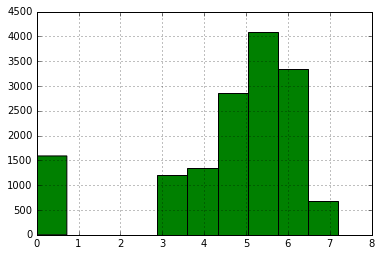

In [19]:
train['Horiz_dist_to_hydro_transformed'].hist(color='green');

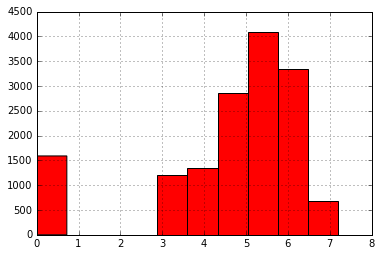

In [20]:
train['Horiz_dist_to_hydro_transformed'].hist(color='red');

In [21]:
train['Horiz_dist_to_roads_transformed'] = np.log(1 + train['Horizontal_Distance_To_Roadways'])
test['Horiz_dist_to_roads_transformed'] = np.log(1 + test['Horizontal_Distance_To_Roadways'])

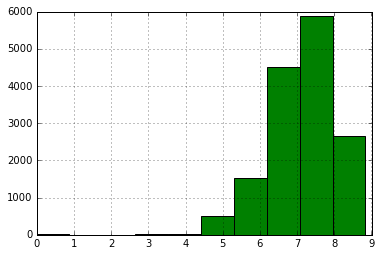

In [22]:
train['Horiz_dist_to_roads_transformed'].hist(color='green');

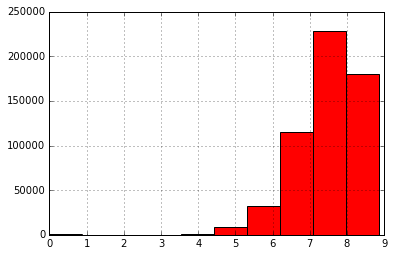

In [23]:
test['Horiz_dist_to_roads_transformed'].hist(color='red');

При подобных преобразованиях надо быть аккуратным:

- Преобразование должно быть одинаковым для обучающей и тестовой выборки
- Преобразование должно быть применимо к тестовой выборке

In [24]:
train['Vert_dist_to_hydro_transformed'] = np.log(-train['Vertical_Distance_To_Hydrology'].min() 
                                                 + 1 + train['Vertical_Distance_To_Hydrology'])
test['Vert_dist_to_hydro_transformed'] = np.log(-min(train['Vertical_Distance_To_Hydrology'].min(),
                                                     test['Vertical_Distance_To_Hydrology'].min())
                                                 + 1 + test['Vertical_Distance_To_Hydrology'])

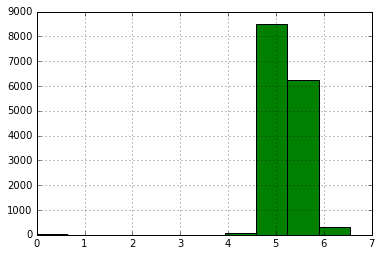

In [25]:
train['Vert_dist_to_hydro_transformed'].hist(color='green');

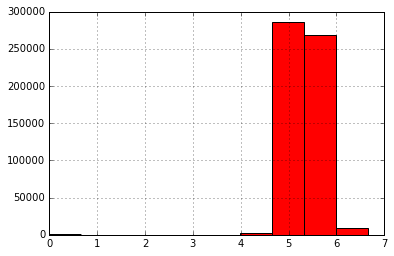

In [26]:
test['Vert_dist_to_hydro_transformed'].hist(color='red');

**Видим, что Vertical_Distance_To_Hydrology иногда бывает отрицательной, возможно, тем самым выделяется некоторый новый класс**

In [27]:
train['Under_water'] = train.Vertical_Distance_To_Hydrology < 0
test['Under_water'] = test.Vertical_Distance_To_Hydrology < 0

**Дальше пробуем строить графики зависимости некоторых признаков друг от друга**

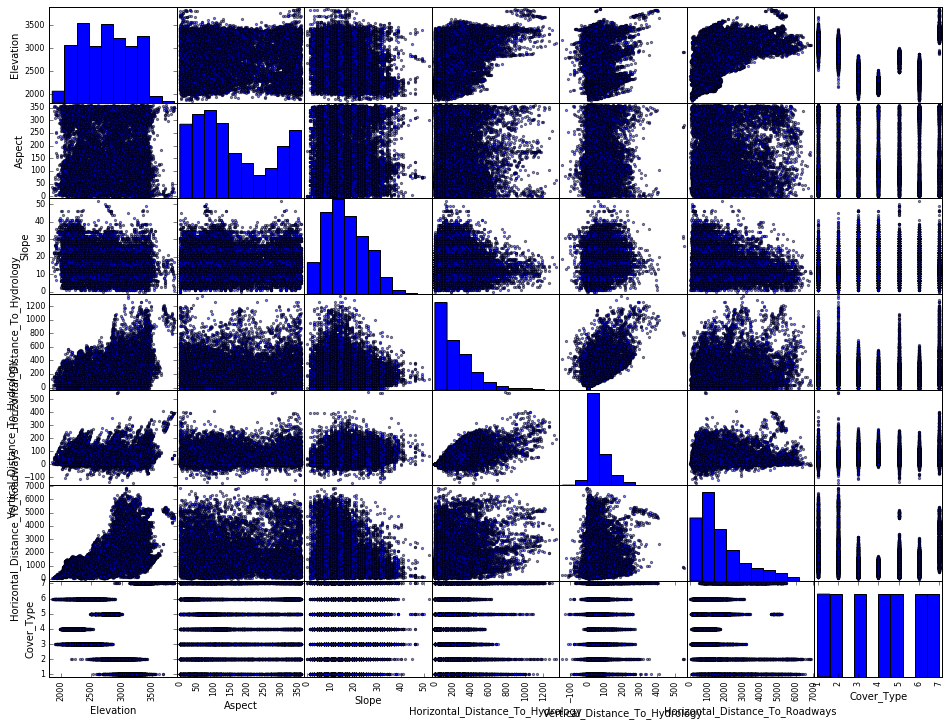

In [28]:
pd.scatter_matrix(train[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                   'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Cover_Type']], figsize=(16,12))
plt.show()

**Посмотрим на Elevation и Vertical_Distance_to_Hidrology**

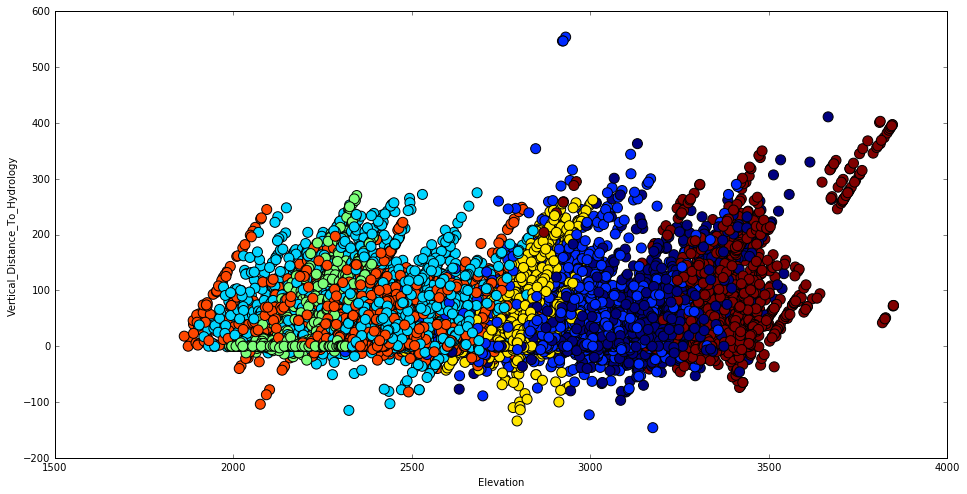

In [29]:
import numpy as np

def plotc(c1,c2):

    fig = plt.figure(figsize=(16,8))
    sel = np.array(list(train.Cover_Type.values))

    plt.scatter(c1, c2, c=sel, s=100)
    plt.xlabel(c1.name)
    plt.ylabel(c2.name)
    
plotc(train.Elevation, train.Vertical_Distance_To_Hydrology)

**А теперь еще лучше график**

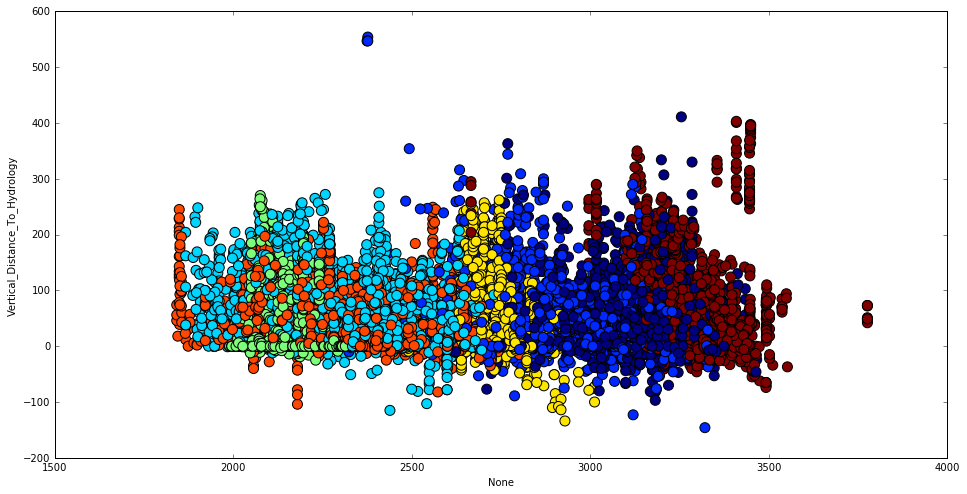

In [30]:
plotc(train.Elevation - train.Vertical_Distance_To_Hydrology, 
      train.Vertical_Distance_To_Hydrology)

In [31]:
train['EVDtH'] = train.Elevation - train.Vertical_Distance_To_Hydrology
test['EVDtH'] = test.Elevation - test.Vertical_Distance_To_Hydrology

train['EHDtH'] = train.Elevation - train.Horizontal_Distance_To_Hydrology*0.2
test['EHDtH'] = test.Elevation - test.Horizontal_Distance_To_Hydrology*0.2

**Дальше можем создать еще множество дополнительных признаков**

In [32]:
train['Distanse_to_Hydrolody'] = (train['Horizontal_Distance_To_Hydrology'] ** 2 + 
                                  train['Vertical_Distance_To_Hydrology']**2) ** 0.5
test['Distanse_to_Hydrolody'] = (test['Horizontal_Distance_To_Hydrology']**2 + 
                                 test['Vertical_Distance_To_Hydrology']**2) ** 0.5

train['Hydro_Fire_1'] = train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Fire_Points']
test['Hydro_Fire_1'] = test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Fire_Points']

train['Hydro_Fire_2'] = abs(train['Horizontal_Distance_To_Hydrology'] - train['Horizontal_Distance_To_Fire_Points'])
test['Hydro_Fire_2'] = abs(test['Horizontal_Distance_To_Hydrology'] - test['Horizontal_Distance_To_Fire_Points'])

train['Hydro_Road_1'] = abs(train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways'])
test['Hydro_Road_1'] = abs(test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways'])

train['Hydro_Road_2'] = abs(train['Horizontal_Distance_To_Hydrology'] - train['Horizontal_Distance_To_Roadways'])
test['Hydro_Road_2'] = abs(test['Horizontal_Distance_To_Hydrology'] - test['Horizontal_Distance_To_Roadways'])

train['Fire_Road_1'] = abs(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Roadways'])
test['Fire_Road_1'] = abs(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Roadways'])

train['Fire_Road_2'] = abs(train['Horizontal_Distance_To_Fire_Points'] - train['Horizontal_Distance_To_Roadways'])
test['Fire_Road_2'] = abs(test['Horizontal_Distance_To_Fire_Points'] - test['Horizontal_Distance_To_Roadways'])

In [33]:
feature_cols = [col for col in train.columns if col not in ['Cover_Type','Id']]

X_train = train[feature_cols]
X_test = test[feature_cols]
y = train['Cover_Type']
test_ids = test['Id']

In [34]:
forest_with_features = RandomForestClassifier(n_estimators=200, 
                                              n_jobs=-1,
                                              bootstrap=True, 
                                              oob_score=True, 
                                              random_state=42)

In [35]:
forest_with_features.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [36]:
forest_with_features.oob_score_

0.89451058201058198

In [37]:
rf_with_features_prediction = forest_with_features.predict(X_test)

In [38]:
write_to_submission_file(rf_with_features_prediction, 
                         '../../output/forest_feature_engineering.csv')

**У такой посылки на Kaggle результат - 0.7811.**

**Посмотрим на важность признаков:**

In [39]:
pd.DataFrame(forest_with_features.feature_importances_,index=X_train.columns).sort([0], ascending=False) [:10]

,0
EHDtH,0.116850
EVDtH,0.108886
Elevation,0.104968
Fire_Road_1,0.036239
Hydro_Road_1,0.032533
Hydro_Road_2,0.031822
Horiz_dist_to_roads_transformed,0.031511
Horizontal_Distance_To_Roadways,0.030321
Hydro_Fire_1,0.027987
Distanse_to_Hydrolody,0.025621
